# Data Management and Visualization

***

## Developing a Research Question and Creating Your Personal Code Book

STEP 1: Choose a data set that you would like to work with.

I am choosing GapMinder dataset.

STEP 2. Identify a specific topic of interest

I am exploring is there a relationship on Polity scores with life expectancy.

STEP 3. Prepare a codebook of your own (i.e., print individual pages or copy screen and paste into a new document) from the larger codebook that includes the questions/items/variables that measure your selected topics.)

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|country | Unique Identifier	|
|incomeperperson |	2010 Gross Domestic Product per capita in constant 2000 US$|
|alcconsumption | 2008 alcohol consumption per adult (age 15+), litres	|
|armedforcesrate |	Armed forces personnel (% of total labor force) |
|breastcancerper100th |	2002 breast cancer new cases per 100,000 female|
|co2emissions | 2006 cumulative CO2 emission (metric tons)	|
|femaleemployrate |	2007 female employees age 15+ (% of population)|
|hivrate |	2009 estimated HIV Prevalence % - (Ages 15-49) |
|internetuserate | 2010 Internet users (per 100 people)	|
|lifeexpectancy | 2011 life expectancy at birth (years)	|
|oilperperson | 2010 oil Consumption per capita (tonnes per year and person)	|
|polityscore | 2009 Democracy score (Polity)	|
|relectricperperson | 2008 residential electricity consumption, per person (kWh)	|
|suicideper100th | 2005 Suicide, age adjusted, per 100 000	|
|employrate |2007 total employees age 15+ (% of population)	|
|urbanrate |2008 urban population (% of total)	|

STEP 4. Identify a second topic that you would like to explore in terms of its association with your original topic

The second one is has employment rate influence urban rates.

STEP 5. Add questions/items/variables documenting this second topic to your personal codebook

STEP 6. Perform a literature review to see what research has been previously done on this topic. 

Ref 1: Health advocacy with Gapminder animated statistics

Ref 2: Formalizing students’ informal statistical reasoning on real data: Using Gapminder to follow the cycle of inquiry and visual analyses

Ref 3: USE OF TED.COM and GAPMINDER.ORG IN TEACHING APPLICATIONS OF MATHEMATICS AND STATISTICS

STEP 7. Based on your literature review, develop a hypothesis about what you believe the association might be between these topics. Be sure to integrate the specific variables you selected into the hypothesis. 

Hypothesis suggested: Has suicide rate influenced by HIV rate on victims?

***

## Running Your First Program

STEP 1: Run your first program. This program will be used throughout the remainder of the course and become the basis of your data analysis going forward. 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats
from collections import Counter


import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
import feature_engine
from feature_engine import imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("gapminder.csv")

In [3]:
df

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Vietnam,722.807558834445,3.91,1.0853671,16.2,1425435000,67.5999984741211,.4,27.8518215557703,75.181,,-7,302.725654656034,11.6533222198486,71,27.84
209,West Bank and Gaza,,,5.9360854,,14241333.3333333,11.3000001907349,,36.4227717919075,72.832,,,,,32,71.9
210,"Yemen, Rep.",610.3573673206,.2,2.3162346,35.1,234864666.666667,20.2999992370605,,12.3497504635596,65.493,,-2,130.05783139719,6.26578903198242,39,30.64
211,Zambia,432.226336974583,3.56,.3413352,13,132025666.666667,53.5,13.5,10.124986462443,49.025,,7,168.623030511023,12.0190362930298,61,35.42


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country               213 non-null    object
 1   incomeperperson       213 non-null    object
 2   alcconsumption        213 non-null    object
 3   armedforcesrate       213 non-null    object
 4   breastcancerper100th  213 non-null    object
 5   co2emissions          213 non-null    object
 6   femaleemployrate      213 non-null    object
 7   hivrate               213 non-null    object
 8   internetuserate       213 non-null    object
 9   lifeexpectancy        213 non-null    object
 10  oilperperson          213 non-null    object
 11  polityscore           213 non-null    object
 12  relectricperperson    213 non-null    object
 13  suicideper100th       213 non-null    object
 14  employrate            213 non-null    object
 15  urbanrate             213 non-null    ob

STEP 2: Run frequency distributions for your chosen variables and select columns, and possibly rows.

In [5]:
df.columns

Index(['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate'], dtype='object')

In [6]:
df2 = df[['lifeexpectancy','polityscore','employrate', 'urbanrate','suicideper100th','hivrate']]

In [7]:
df2

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate
0,48.673,0,55.7000007629394,24.04,6.68438529968262,
1,76.918,9,51.4000015258789,46.72,7.69932985305786,
2,73.131,2,50.5,65.22,4.8487696647644,.1
3,,,,88.92,5.36217880249023,
4,51.093,-2,75.6999969482422,56.7,14.5546770095825,2
...,...,...,...,...,...,...
208,75.181,-7,71,27.84,11.6533222198486,.4
209,72.832,,32,71.9,,
210,65.493,-2,39,30.64,6.26578903198242,
211,49.025,7,61,35.42,12.0190362930298,13.5


### Type Change

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   lifeexpectancy   213 non-null    object
 1   polityscore      213 non-null    object
 2   employrate       213 non-null    object
 3   urbanrate        213 non-null    object
 4   suicideper100th  213 non-null    object
 5   hivrate          213 non-null    object
dtypes: object(6)
memory usage: 10.1+ KB


In [9]:
df2 = df2.replace(r'^\s*$', np.nan, regex=True)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   lifeexpectancy   191 non-null    object
 1   polityscore      161 non-null    object
 2   employrate       178 non-null    object
 3   urbanrate        203 non-null    object
 4   suicideper100th  191 non-null    object
 5   hivrate          147 non-null    object
dtypes: object(6)
memory usage: 10.1+ KB


In [11]:
df2["lifeexpectancy"] = df2["lifeexpectancy"].astype("float")

In [12]:
df2["polityscore"] = df2["polityscore"].astype("float")

In [13]:
df2["employrate"] = df2["employrate"].astype("float")

In [14]:
df2["urbanrate"] = df2["urbanrate"].astype("float")

In [15]:
df2["suicideper100th"] = df2["suicideper100th"].astype("float")

In [16]:
df2["hivrate"] = df2["hivrate"].astype("float")

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lifeexpectancy   191 non-null    float64
 1   polityscore      161 non-null    float64
 2   employrate       178 non-null    float64
 3   urbanrate        203 non-null    float64
 4   suicideper100th  191 non-null    float64
 5   hivrate          147 non-null    float64
dtypes: float64(6)
memory usage: 10.1 KB


In [18]:
df2

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate
0,48.67,0.00,55.70,24.04,6.68,NaN
1,76.92,9.00,51.40,46.72,7.70,NaN
2,73.13,2.00,50.50,65.22,4.85,0.10
3,NaN,NaN,NaN,88.92,5.36,NaN
4,51.09,-2.00,75.70,56.70,14.55,2.00
...,...,...,...,...,...,...
208,75.18,-7.00,71.00,27.84,11.65,0.40
209,72.83,NaN,32.00,71.90,NaN,NaN
210,65.49,-2.00,39.00,30.64,6.27,NaN
211,49.02,7.00,61.00,35.42,12.02,13.50


In [19]:
#df2.to_csv("gapminder_research.csv", index=False)

### Groupby Function

In [20]:
df2.groupby(["polityscore"]).count()

,lifeexpectancy,employrate,urbanrate,suicideper100th,hivrate
polityscore,,,,,
-10.00,2,2,2,2,1
-9.00,4,4,4,4,2
-8.00,2,2,2,2,1
-7.00,12,12,12,12,8
-6.00,3,3,3,3,3
-5.00,2,2,2,2,2
-4.00,6,6,6,6,6
-3.00,6,6,6,6,4
-2.00,5,5,5,5,4


In [21]:
df2.describe()

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate
count,191.00,161.00,178.00,203.00,191.00,147.00
mean,69.75,3.69,58.64,56.77,9.64,1.94
std,9.71,6.31,10.52,23.84,6.30,4.38
min,47.79,-10.00,32.00,10.40,0.20,0.06
25%,64.45,-2.00,51.23,36.83,4.99,0.10
50%,73.13,6.00,58.70,57.94,8.26,0.40
75%,76.59,9.00,64.98,74.21,12.33,1.30
max,83.39,10.00,83.20,100.00,35.75,25.90


***

## Making Data Management Decisions

STEP 1: Make and implement data management decisions for the variables you selected

In [22]:
df2 = pd.read_csv("gapminder_research.csv")
df2.head()

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate
0,48.67,0.00,55.70,24.04,6.68,NaN
1,76.92,9.00,51.40,46.72,7.70,NaN
2,73.13,2.00,50.50,65.22,4.85,0.10
3,NaN,NaN,NaN,88.92,5.36,NaN
4,51.09,-2.00,75.70,56.70,14.55,2.00


### Treat Missing Values

In [23]:
df2.isnull().sum()

lifeexpectancy     22
polityscore        52
employrate         35
urbanrate          10
suicideper100th    22
hivrate            66
dtype: int64

In [24]:
df2.describe()

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate
count,191.00,161.00,178.00,203.00,191.00,147.00
mean,69.75,3.69,58.64,56.77,9.64,1.94
std,9.71,6.31,10.52,23.84,6.30,4.38
min,47.79,-10.00,32.00,10.40,0.20,0.06
25%,64.45,-2.00,51.23,36.83,4.99,0.10
50%,73.13,6.00,58.70,57.94,8.26,0.40
75%,76.59,9.00,64.98,74.21,12.33,1.30
max,83.39,10.00,83.20,100.00,35.75,25.90


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lifeexpectancy   191 non-null    float64
 1   polityscore      161 non-null    float64
 2   employrate       178 non-null    float64
 3   urbanrate        203 non-null    float64
 4   suicideper100th  191 non-null    float64
 5   hivrate          147 non-null    float64
dtypes: float64(6)
memory usage: 10.1 KB


In [26]:
imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)

In [27]:
imputer.fit(df2)

MeanMedianImputer()

In [28]:
imputer.imputer_dict_

{'lifeexpectancy': 73.131,
 'polityscore': 6.0,
 'employrate': 58.69999885559085,
 'urbanrate': 57.94,
 'suicideper100th': 8.2628927230835,
 'hivrate': 0.4}

In [29]:
df3 = imputer.transform(df2)

In [30]:
df3

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate
0,48.67,0.00,55.70,24.04,6.68,0.40
1,76.92,9.00,51.40,46.72,7.70,0.40
2,73.13,2.00,50.50,65.22,4.85,0.10
3,73.13,6.00,58.70,88.92,5.36,0.40
4,51.09,-2.00,75.70,56.70,14.55,2.00
...,...,...,...,...,...,...
208,75.18,-7.00,71.00,27.84,11.65,0.40
209,72.83,6.00,32.00,71.90,8.26,0.40
210,65.49,-2.00,39.00,30.64,6.27,0.40
211,49.02,7.00,61.00,35.42,12.02,13.50


In [31]:
df3.isnull().sum()

lifeexpectancy     0
polityscore        0
employrate         0
urbanrate          0
suicideper100th    0
hivrate            0
dtype: int64

In [32]:
#df3.to_csv("gapminderfinal.csv", index=False)

### Equal Width Discretization

In [33]:
df3["demoscorecat"] = df3["polityscore"] #Make a copy

In [34]:
disc = EqualWidthDiscretiser(bins=4, variables=['demoscorecat'], return_object=True)

In [35]:
disc

EqualWidthDiscretiser(bins=4, return_object=True, variables=['demoscorecat'])

In [36]:
disc.fit(df3)

EqualWidthDiscretiser(bins=4, return_object=True, variables=['demoscorecat'])

In [37]:
disc.binner_dict_

{'demoscorecat': [-inf, -5.0, 0.0, 5.0, inf]}

In [38]:
df4 = disc.fit_transform(df3)
df4.head()

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate,demoscorecat
0,48.67,0.00,55.70,24.04,6.68,0.40,1
1,76.92,9.00,51.40,46.72,7.70,0.40,3
2,73.13,2.00,50.50,65.22,4.85,0.10,2
3,73.13,6.00,58.70,88.92,5.36,0.40,3
4,51.09,-2.00,75.70,56.70,14.55,2.00,1


In [39]:
df4["demoscorecat"].value_counts()

3    142
1     27
0     25
2     19
Name: demoscorecat, dtype: int64

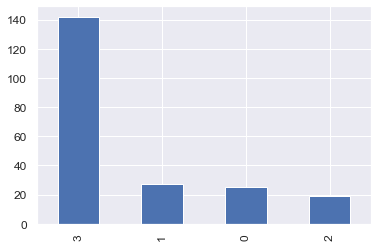

In [40]:
df4["demoscorecat"].value_counts().plot.bar()
plt.show()

In [41]:
#df4.to_csv("gapminderfinal.csv", index=False)

STEP 2: Run frequency distributions for your chosen variables and select columns, and possibly rows. 

In short, I have encoded the polityscore variable into 4 parts and settled all missing data.

***

## Creating graphs for your data

In [42]:
df4 = pd.read_csv("gapminderfinal.csv")
df4

,lifeexpectancy,polityscore,employrate,urbanrate,suicideper100th,hivrate,demoscorecat
0,48.67,0.00,55.70,24.04,6.68,0.40,1
1,76.92,9.00,51.40,46.72,7.70,0.40,3
2,73.13,2.00,50.50,65.22,4.85,0.10,2
3,73.13,6.00,58.70,88.92,5.36,0.40,3
4,51.09,-2.00,75.70,56.70,14.55,2.00,1
...,...,...,...,...,...,...,...
208,75.18,-7.00,71.00,27.84,11.65,0.40,0
209,72.83,6.00,32.00,71.90,8.26,0.40,3
210,65.49,-2.00,39.00,30.64,6.27,0.40,1
211,49.02,7.00,61.00,35.42,12.02,13.50,3


STEP 1: Create graphs of your variables one at a time (univariate graphs)

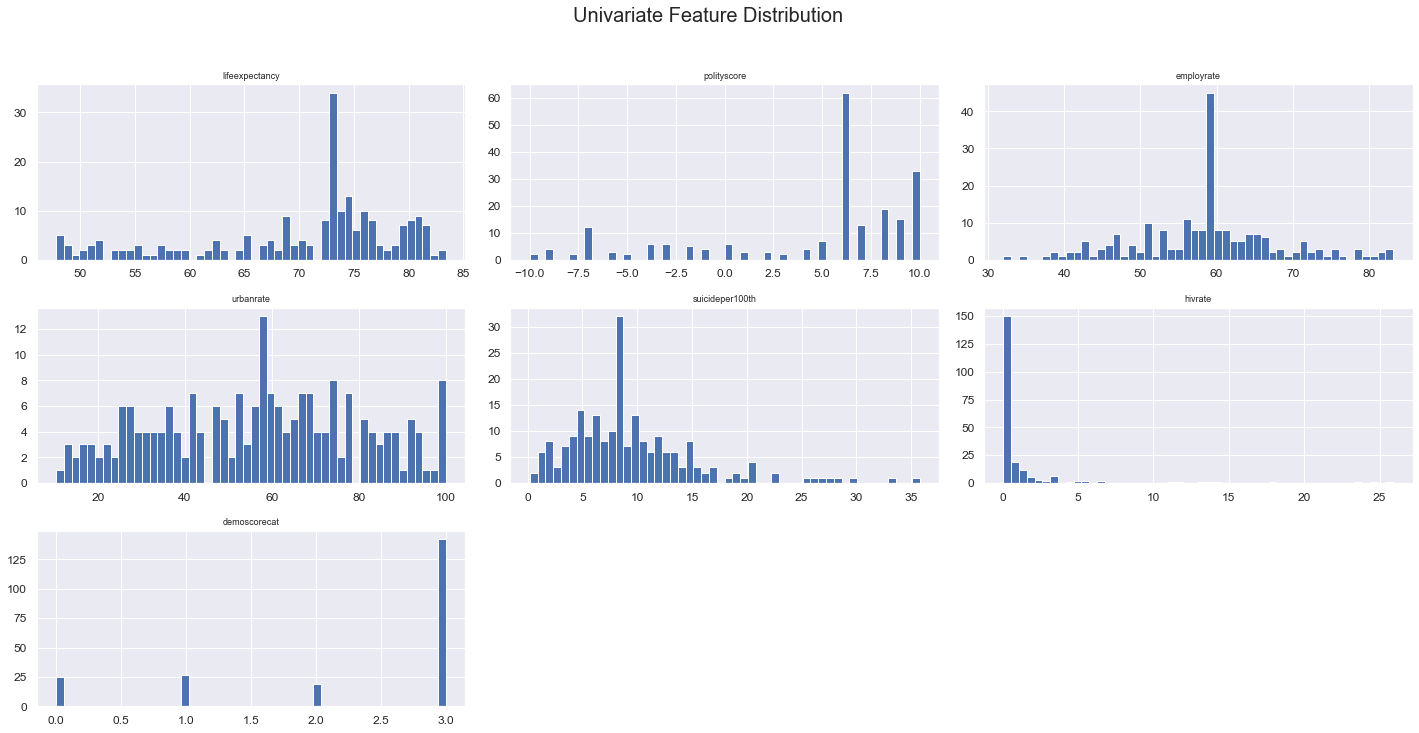

In [43]:
df4.hist(bins=50, figsize=(20,10))
plt.suptitle('Univariate Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

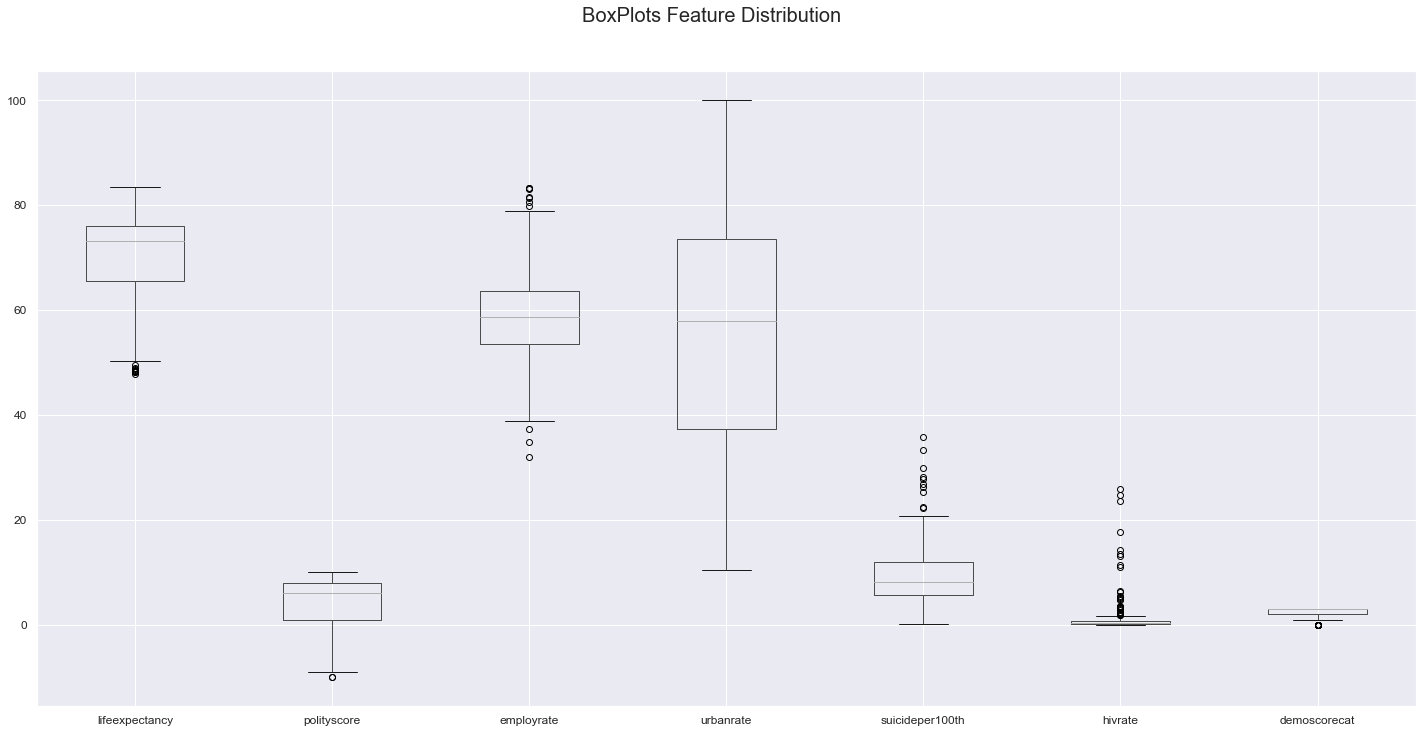

In [44]:
df4.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

STEP 2: Create a graph showing the association between your explanatory and response variables (bivariate graph)

Relationship on Polity scores with life expectancy.

Employment rate influence urban rates.

In [45]:
df4.columns

Index(['lifeexpectancy', 'polityscore', 'employrate', 'urbanrate', 'suicideper100th', 'hivrate', 'demoscorecat'], dtype='object')

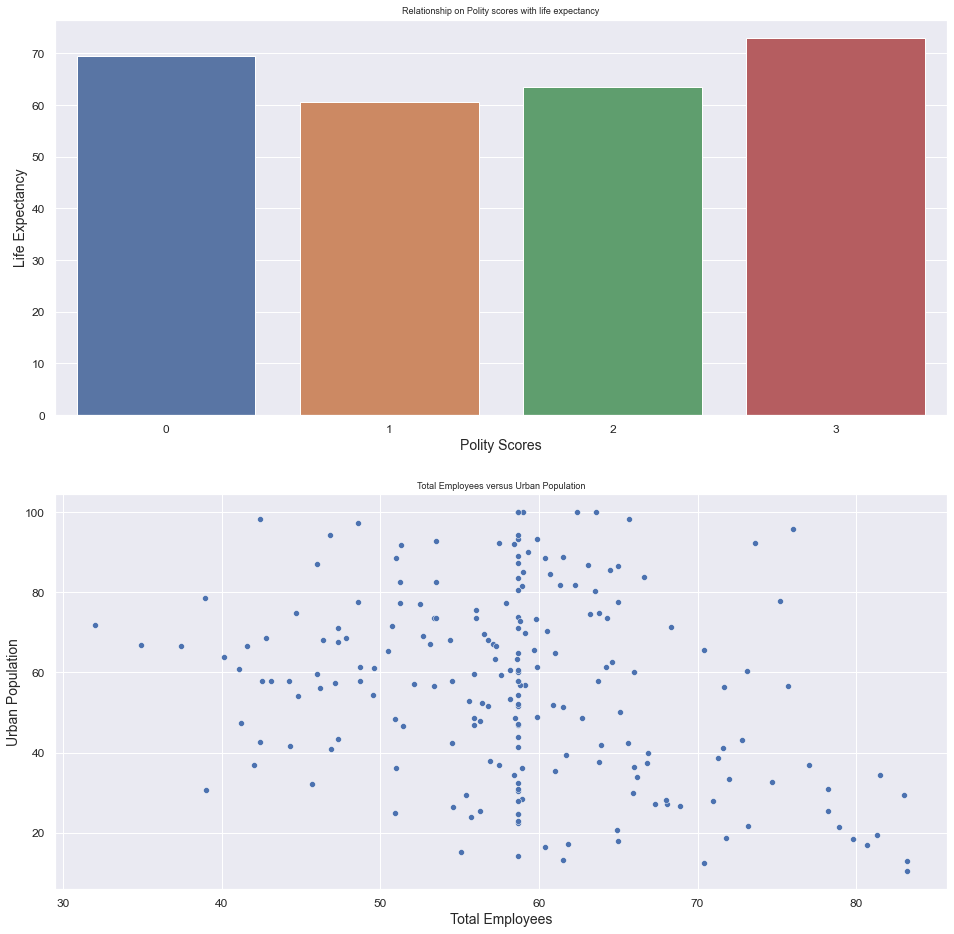

In [46]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(2,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title')


sns.barplot(x="demoscorecat", y="lifeexpectancy", data=df4, ax=ax[0], ci=None)
ax[0].set_title('Relationship on Polity scores with life expectancy')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("Polity Scores")
ax[0].set_ylabel("Life Expectancy")

sns.scatterplot(x="employrate", y="urbanrate", data=df4, ax=ax[1])
ax[1].set_title('Total Employees versus Urban Population')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("Total Employees")
ax[1].set_ylabel("Urban Population")

plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

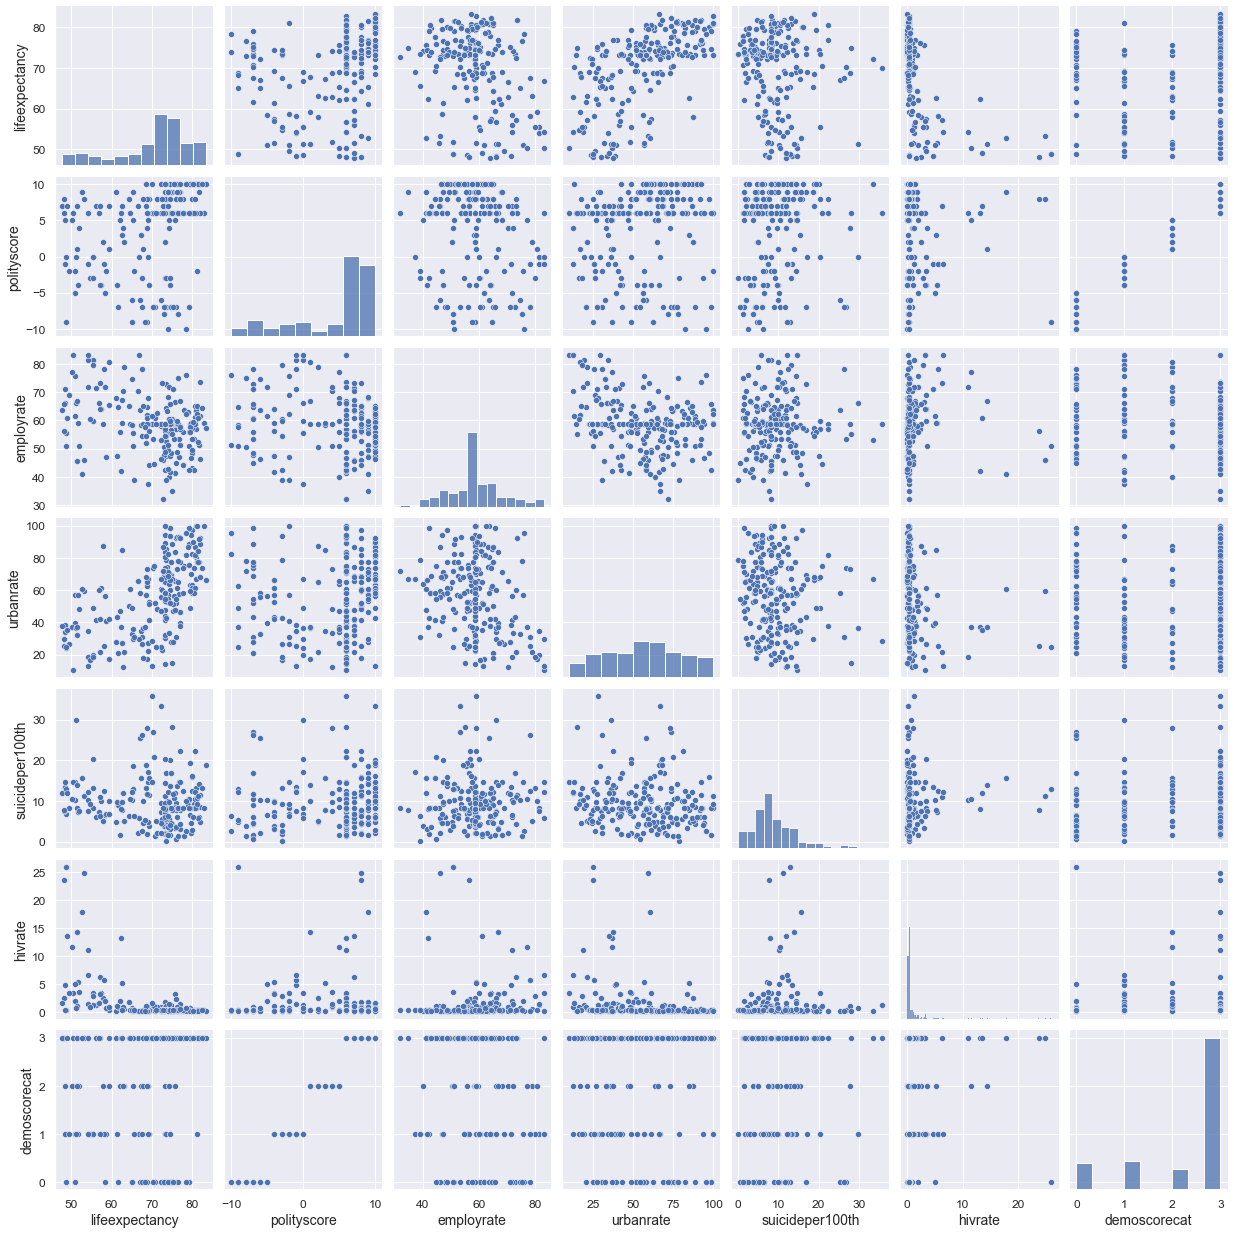

In [47]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df4)
plt.show()

The first graph shows that the higher the Polity Score, the life expectancy has improved.

The second graph shows no relationship between total employees with urban population.

***